# **CASE: PREÇOS DIÁRIOS DE AÇÃO**

---

### Instalação de bibliotecas

In [1]:
# # Para teste de estacionariedade
# install.packages("urca")
# # Para ajuste automático de modelo ARIMA e realização de previsões
# install.packages("forecast")

### Carregamento de bibliotecas

In [2]:
library(urca)
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



### Leitura da base de dados

In [3]:
dados_precos <- read.table(file = "../Dados/Precos_Acao.txt",
                           sep = "\t",
                           dec = ".",
                           header = TRUE)

### Visualização da base de dados

In [4]:
View(dados_precos)

DIA_UTIL,PRECO_ACAO
<int>,<dbl>
1,14.82
2,15.68
3,15.91
4,15.01
5,14.24
6,14.01
7,14.42
8,14.82
9,15.27


### Definição da série

In [5]:
serie <- ts(dados_precos$PRECO_ACAO)

### Análise exploratória da série

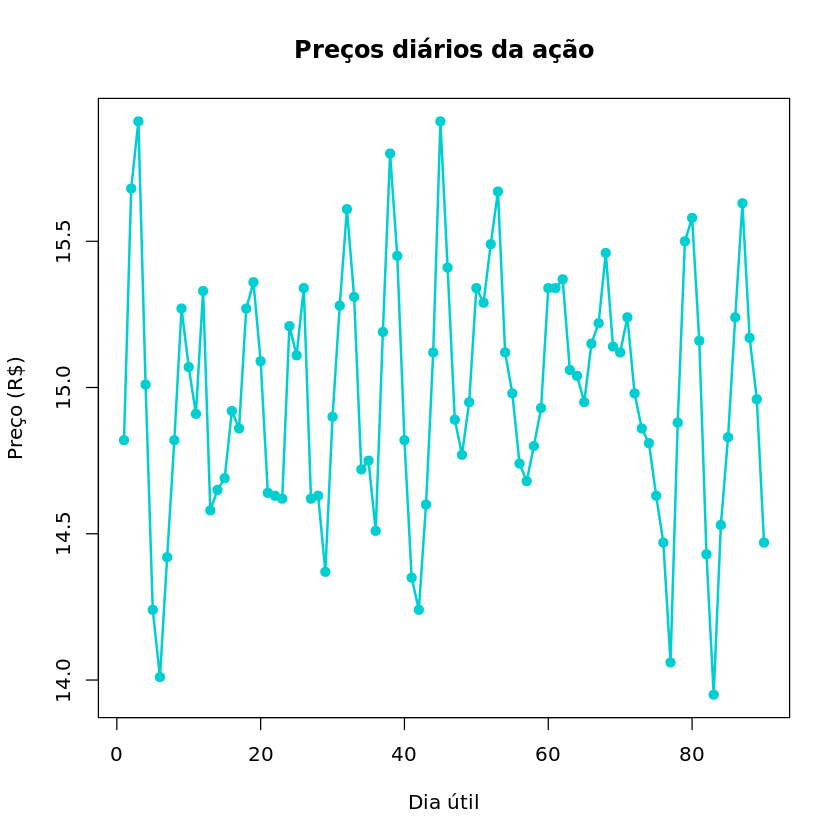

In [6]:
# Gráfico da série
plot(serie,
     lwd = 2,
     col = "darkturquoise",
     main = "Preços diários da ação",
     xlab = "Dia útil",
     ylab = "Preço (R$)")
points(serie,
       pch = 19,
       col = "darkturquoise")

In [7]:
# Teste de estacionariedade de Dickey-Fuller Generalizado (DF-GLS)
teste <- ur.ers(serie)
summary(teste)


############################################### 
# Elliot, Rothenberg and Stock Unit Root Test # 
############################################### 

Test of type DF-GLS 
detrending of series with intercept 


Call:
lm(formula = dfgls.form, data = data.dfgls)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.57533 -0.11575  0.03085  0.25564  0.69905 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
yd.lag        -0.4942     0.1480  -3.338  0.00128 **
yd.diff.lag1   0.2293     0.1363   1.682  0.09643 . 
yd.diff.lag2   0.1609     0.1109   1.451  0.15072   
yd.diff.lag3  -0.2091     0.1058  -1.975  0.05168 . 
yd.diff.lag4  -0.2292     0.1052  -2.178  0.03232 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2694 on 80 degrees of freedom
Multiple R-squared:  0.5078,	Adjusted R-squared:  0.477 
F-statistic: 16.51 on 5 and 80 DF,  p-value: 3.628e-11


Value of test-statistic is: -3.3382 

Critical values of DF-GLS a

In [8]:
# Verificação de se é possível rejeitar a hipótese nula de não estacionariedade (TRUE representa sim, FALSE representa não)
teste@teststat < teste@cval

,1pct,5pct,10pct
critical values,TRUE,TRUE,TRUE


### Identificação do modelo da classe (S)ARIMA

In [9]:
# Ajuste do melhor modelo
modelo <- auto.arima(serie)
print(modelo)

Series: serie 
ARIMA(2,0,2) with non-zero mean 

Coefficients:
         ar1      ar2      ma1     ma2     mean
      1.1288  -0.8777  -0.4721  0.3888  14.9700
s.e.  0.0758   0.0655   0.1329  0.1257   0.0336

sigma^2 = 0.071:  log likelihood = -7.13
AIC=26.26   AICc=27.27   BIC=41.26


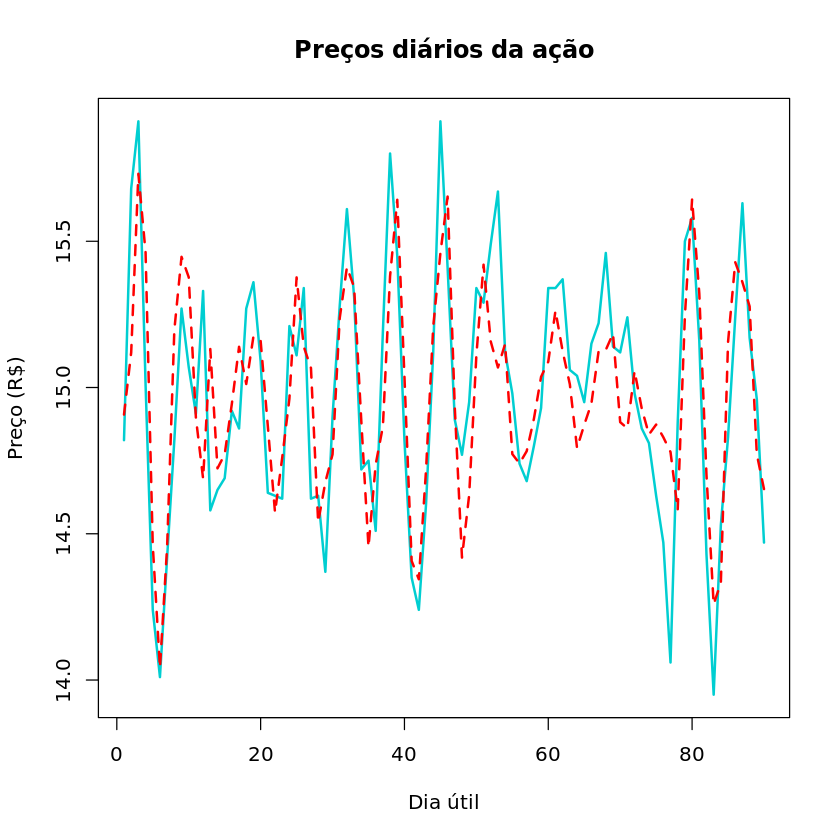

In [10]:
# Gráfico dos valores observados da série versus valores preditos pelo modelo
plot(serie,
     type = "l",
     lwd = 2,
     col = "darkturquoise",
     main = "Preços diários da ação",
     xlab = "Dia útil",
     ylab = "Preço (R$)")
points(modelo$fitted,
       type = "l",
       lwd = 2,
       lty = 2,
       col = "red")

### Diagnóstico do modelo

In [11]:
# Cálculo do REQM
sqrt(mean(modelo$residuals^2))

[1] 0.2589421

### Previsões do modelo





In [12]:
# Previsões para os próximos 3 dias úteis
previsoes <- forecast(modelo, h = 40)
round(previsoes$mean, 2)

A Time Series:
 [1] 14.57 14.89 15.23 15.33 15.15 14.86 14.68 14.75 14.97 15.16 15.19 15.05
[13] 14.87 14.78 14.85 15.00 15.11 15.10 15.00 14.88 14.85 14.91 15.01 15.06
[25] 15.04 14.97 14.91 14.90 14.94 15.00 15.03 15.01 14.96 14.92 14.93 14.96
[37] 15.00 15.01 14.99 14.96

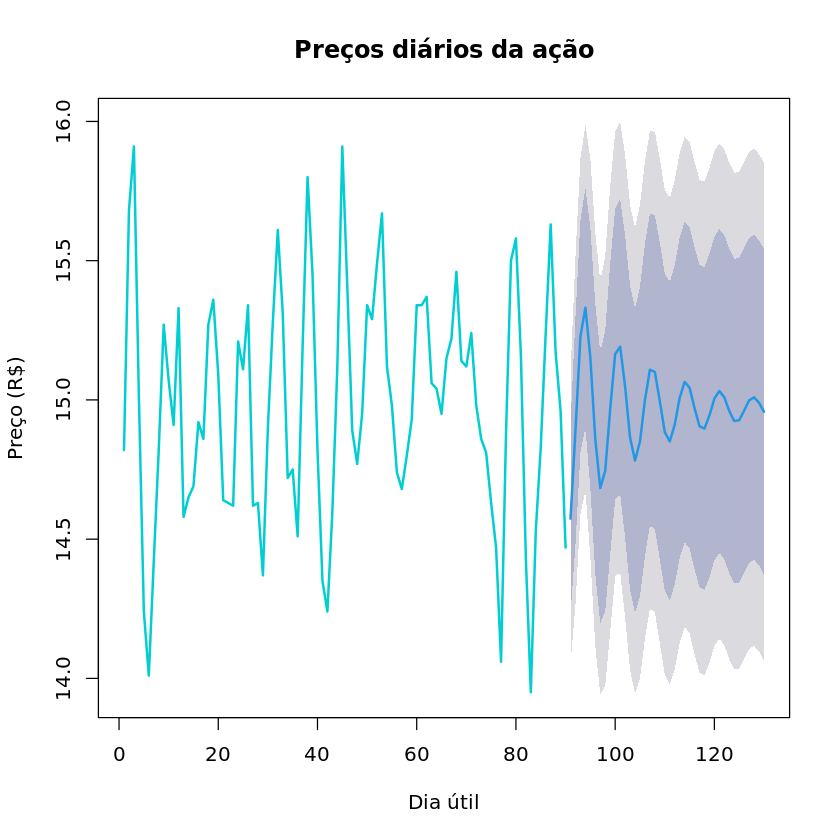

In [13]:
# Gráfico da série, incluindo previsões
plot(previsoes,
     type = "l",
     lwd = 2,
     col = "darkturquoise",
     main = "Preços diários da ação",
     xlab = "Dia útil",
     ylab = "Preço (R$)")